<a href="https://colab.research.google.com/github/Mulac/TDA-SentimentAnalysis/blob/master/fastaiTwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.text import *
from google.colab import drive

In [ ]:
path = Path('/content/drive/My Drive/Colab Notebooks')

In [ ]:
df = pd.read_csv(path/'Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
train_df, valid_df = df.loc[:12000,:], df.loc[12000:,:]
len(train_df), len(valid_df)

(12001, 2640)

In [ ]:
data_lm = TextLMDataBunch.from_df(Path(path), train_df, valid_df, text_cols=10, bs=32)
data_clas = TextClasDataBunch.from_df(Path(path), train_df, valid_df, text_cols=10, label_cols=1, bs=32)

In [ ]:
data_lm.show_batch()

idx,text
0,"about it xxbos @virginamerica seriously would pay $ 30 a flight for seats that did n't have this playing . \n it 's really the only bad thing about flying xxup va xxbos @virginamerica yes , nearly every time i fly xxup vx this “ xxunk xxunk ” wo n’t go away :) xxbos @virginamerica xxmaj really missed a prime opportunity for xxmaj men xxmaj without xxmaj hats xxunk"
1,"only you guys were starting those flights at the end of the month ! xxmaj guess i ’m still road tripping on xxmaj feb 27 … xxbos @virginamerica thanks for that . xxmaj been needing a way to make those xxmaj austin trips from xxup dca , and now you 've come through ! xxbos @virginamerica announced xxmaj new xxmaj route to xxmaj austin w / fares from $ 39"
2,. xxmaj delhi call centers . xxmaj poor xxmaj united staff spread thin and stressed . xxmaj you name it . xxbos @united xxmaj yes . xxmaj does n't make that mistake any less absurd . xxmaj does n't change the fact that i 'm very xxunk missing my luggage tonight . xxbos @united i 'm constantly having challenges with upgrades & & charges . xxmaj in order to prevent
3,"xxbos @united , and now while waiting for new pilot the door on plane xxup broke . why am i global services status on an airline that 's unsafe ? xxup stunning xxbos @united xxmaj how do i get reimbursed for hotel and taxis for the xxmaj cancelled xxmaj flightation ? xxbos @united xxmaj awesome flight crew on xxup xxunk , re the plane , the xxmaj xxunk period called"
4,xxmaj flight 2 is 2:30 hrs delayed so far b / c of xxmaj late xxmaj flight crew . xxmaj now we are literally waiting while they have dinner xxunk . to honest gate agent . xxbos @united many people on xxmaj xxunk are going to miss connections due to long wait time in xxup sfo tarmac . xxmaj seriously u ca n't find an empty gate ? xxbos @united


In [ ]:
data_clas.show_batch()

text,target
xxbos @united xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup dub - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup dub 13 / 10 . i 'm * xxup g. xxmaj what is checked bag allowance for xxup jac - xxup lax ?,neutral
xxbos @virginamerica xxmaj many xxmaj thanks for the xxmaj follow . \n # ourprincess # freyasfund # xxup usa # xxmaj xxunk \n xxmaj looking for xxmaj any xxmaj help 😍 \n 💗 🇬 🇧 💗 🇺 🇸 💗 \n 🎀 🌏 🎀 http : / / t.co / xxunk,neutral
"xxbos @usairways 4 segments , 4 / 4 delayed . xxmaj gnv > xxup ctl . xxup ctl > xxup jan . xxup jan > xxup ctl . xxup ctl > xxup gnv . xxmaj my year off from flying with you guys was the way to go .",negative
"xxbos @jetblue i tried ! xxmaj had me running from curb - side to self - check & & wasting even more time . xxmaj ended up xxmaj flight xxmaj booking xxmaj problems xxmaj united for $ $ $ , am so upset",negative
"xxbos @jetblue big shoutout to the crews on xxunk xxmaj bos > jfk & & xxunk jfk > roc , & & gate crews at c19 xxmaj bos & & 6 jfk . xxmaj long day of delays made better by them !",positive


Language model



In [ ]:
learn = language_model_learner(data_lm, drop_mult=0.3, arch=AWD_LSTM, pretrained=True)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


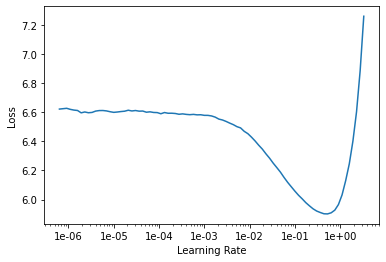

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.345260,4.074062,0.243676,00:09


In [ ]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


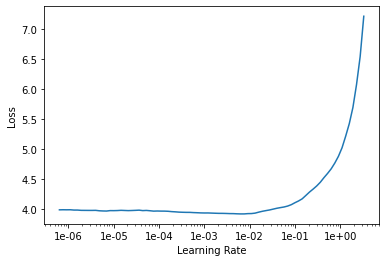

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.840580,3.942207,0.263958,00:11
1,3.706102,3.832364,0.274449,00:11
2,3.532414,3.774825,0.280565,00:11
3,3.257273,3.761845,0.283527,00:11
4,2.924583,3.835918,0.282545,00:11
5,2.571664,3.917611,0.277232,00:11
6,2.251090,4.020127,0.276310,00:11
7,2.030255,4.118057,0.275045,00:11
8,1.884035,4.169336,0.274018,00:11
9,1.804122,4.187119,0.273527,00:11


In [ ]:
learn.save('twitter-sentiment-lm')

Testing our language model

In [ ]:
TEXT = "I liked "
N_WORDS = 40
N_SENTENCES = 2

In [ ]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked  ! ! ! Flight Cancelled Flightled ! xxbos @usairways thank you for your help ! i will always have a companion pass for you . xxbos @southwestair i appreciate the quick response but i ca n't even
I liked  you guys have so much fun with me ! ! ! xxbos @southwestair i see if i can get my points to my account ? i have to use the online reference number . Any ideas ? xxbos @usairways


In [ ]:
learn.save_encoder('twitter-sentiment-enc')

## Classifier

In [ ]:
learn = text_classifier_learner(data_clas, drop_mult=0.3, arch=AWD_LSTM, pretrained=True)
learn.load_encoder('twitter-sentiment-enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (12001 items)
x: TextList
xxbos @virginamerica xxmaj what xxunk said .,xxbos @virginamerica plus you 've added commercials to the experience ... xxunk .,xxbos @virginamerica i did n't today ... xxmaj must mean i need to take another trip !,xxbos @virginamerica it 's really aggressive to blast obnoxious " entertainment " in your guests ' faces & & they have little recourse,xxbos @virginamerica and it 's a really big bad thing about it
y: CategoryList
neutral,positive,neutral,negative,negative
Path: /content/drive/My Drive/Colab Notebooks;

Valid: LabelList (2640 items)
x: TextList
xxbos @americanair xxmaj you xxmaj cancelled xxmaj flight my flight and there ’s no way to rebook on the website or app ? i have to wait 35 minutes on hold ? # fail cc @delta,xxbos @americanair i thought all those planes were xxunk ? # xxup xxunk,xxbos xxmaj just got off the phone @americanair customer service . xxmaj only 8 minutes to get my issue xxunk . x

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


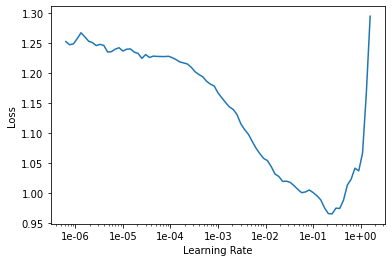

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.615535,0.473524,0.810606,00:06


In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.567832,0.420649,0.835606,00:07


In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.492879,0.408625,0.837879,00:11


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.384525,0.388420,0.848864,00:15
1,0.308078,0.397703,0.848106,00:15


In [ ]:
print(learn)

RNNLearner(data=TextClasDataBunch;

Train: LabelList (12001 items)
x: TextList
xxbos @virginamerica xxmaj what xxunk said .,xxbos @virginamerica plus you 've added commercials to the experience ... xxunk .,xxbos @virginamerica i did n't today ... xxmaj must mean i need to take another trip !,xxbos @virginamerica it 's really aggressive to blast obnoxious " entertainment " in your guests ' faces & & they have little recourse,xxbos @virginamerica and it 's a really big bad thing about it
y: CategoryList
neutral,positive,neutral,negative,negative
Path: /content/drive/My Drive/Colab Notebooks;

Valid: LabelList (2640 items)
x: TextList
xxbos @americanair xxmaj you xxmaj cancelled xxmaj flight my flight and there ’s no way to rebook on the website or app ? i have to wait 35 minutes on hold ? # fail cc @delta,xxbos @americanair i thought all those planes were xxunk ? # xxup xxunk,xxbos xxmaj just got off the phone @americanair customer service . xxmaj only 8 minutes to get my issue xxunk . x

In [ ]:
learn.predict("I really loved the flight")

(Category tensor(2), tensor(2), tensor([0.0322, 0.0354, 0.9324]))